# 1We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
pd.options.display.max_columns =100

In [2]:
df= pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df_num=df.select_dtypes(include=np.number)
df_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [45]:
df_cat= df.select_dtypes(object)
df_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2-02,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,6-01,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2-02,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,6-01,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2-02,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2-02,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2-02,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2-02,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2-02,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Customer Lifetime Value


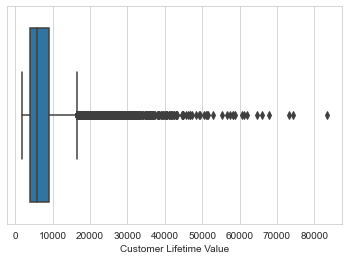

Income


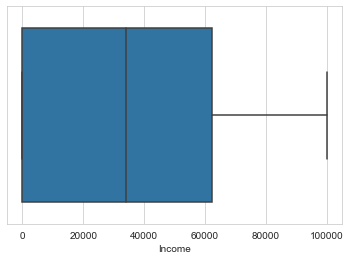

Monthly Premium Auto


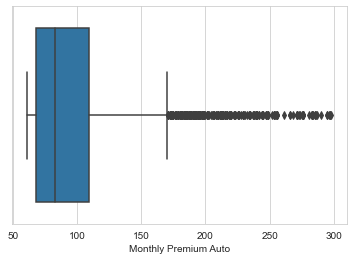

Months Since Last Claim


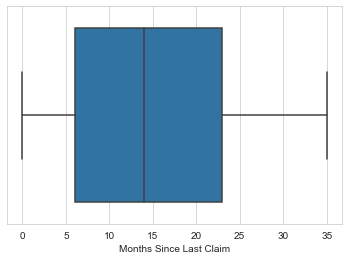

Months Since Policy Inception


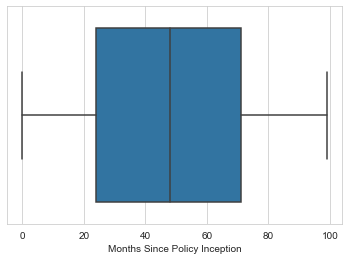

Number of Open Complaints


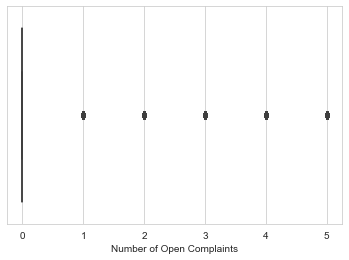

Number of Policies


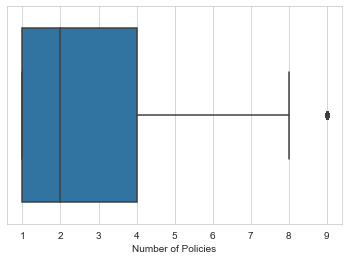

Total Claim Amount


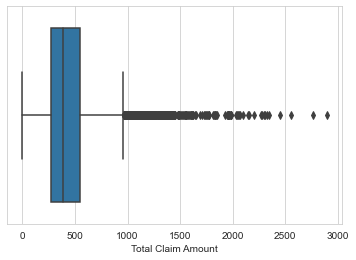

In [4]:
for item in df_num:
    print(item)
    sns.boxplot(x = df_num[item])
    plt.show()

In [10]:
cols = ['Total Claim Amount', 'Customer Lifetime Value', 'Monthly Premium Auto']


(9134, 8)


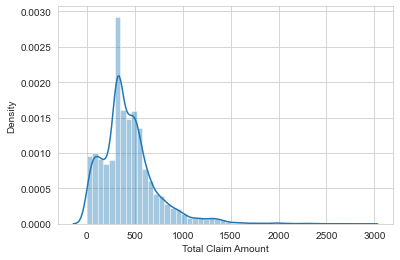

(9134, 8)


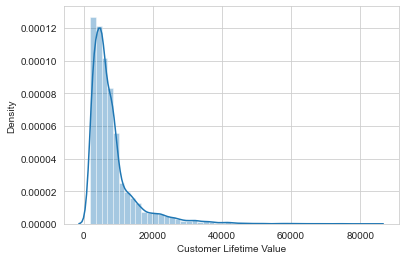

(9134, 8)


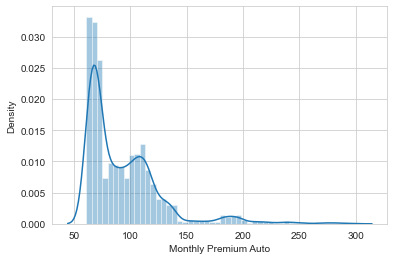

In [12]:
for col in df_num[cols]:
    print(df_num.shape)
    sns.distplot(df_num[col])
    plt.show(cols) 

In [23]:
def clean_outliers (data, columns):

    Q1 = data[columns].quantile(0.25)  #first quantile
    Q3 = data[columns].quantile(0.75)  #second quantile
    IQR = Q3 - Q1           #inter quantiler range

    data = data[~(  #Negation so we get the datapoints inside of the range
        (data[columns] < (Q1 - 1.5 * IQR))
        | (data[columns] > (Q3 + 1.5 * IQR)
          )).any(axis=1)]
    

#Checking of look the boxplots after removing the outliers
    #for drop in columns:
     #   print(data.shape)
      #  sns.distplot(data[drop])
       # plt.show(columns) #column with the outlier
        
    
    return data

In [25]:
numerical_df = clean_outliers(df_num, cols)


In [26]:
df_num.head(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


(7847, 8)


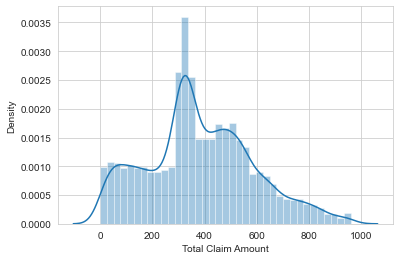

(7847, 8)


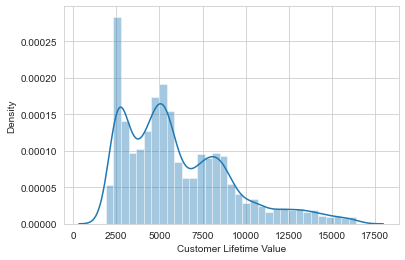

(7847, 8)


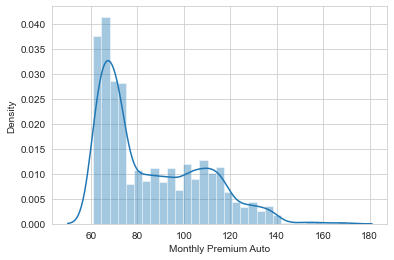

In [27]:
for col in numerical_df[cols]:
    print(numerical_df.shape)
    sns.distplot(numerical_df[col])
    plt.show(cols)

# 2 Create a copy of the dataframe for the data wrangling


In [31]:
df_num_copy = df_num
df_category_copy = df_cat

# 3 Normalize the continuous variables. You can use any one method you want.

In [28]:
from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()
df_num = preprocessor.fit_transform(df_num)

In [32]:
df_num

array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788, -0.22200449]])

# 4 Encode the categorical variables


In [34]:
df_cat.head(5)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [50]:
df_cat.columns = df_cat.columns.str.lower()
df_cat

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2-02,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,6-01,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2-02,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,6-01,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2-02,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2-02,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2-02,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2-02,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2-02,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [59]:
column1 = ['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

column2 = ['coverage', 'employmentstatus', 'location_code', 'vehicle_size']

column1 = df_cat['column1']
column2 = df_cat['column2']

In [62]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor1 = OneHotEncoder()
preprocessor2 = OrdinalEncoder()
column1 = preprocessor1.fit_transform(column1)
column2 = preprocessor2.fit_transform(column2)

#  5 The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [39]:
df["Effective To Date"]= pd.to_datetime(df["Effective To Date"],errors= 'coerce')
df["Effective To Date"]=df["Effective To Date"].apply(lambda x: x.strftime("%w-%m"))#transforms datetime into a year and month
df["Effective To Date"]  

0       2-02
1       6-01
2       2-02
3       6-01
4       2-02
        ... 
9129    2-02
9130    2-02
9131    2-02
9132    2-02
9133    2-02
Name: Effective To Date, Length: 9134, dtype: object

# 6 Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding

In [42]:
df_num

array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788, -0.22200449]])